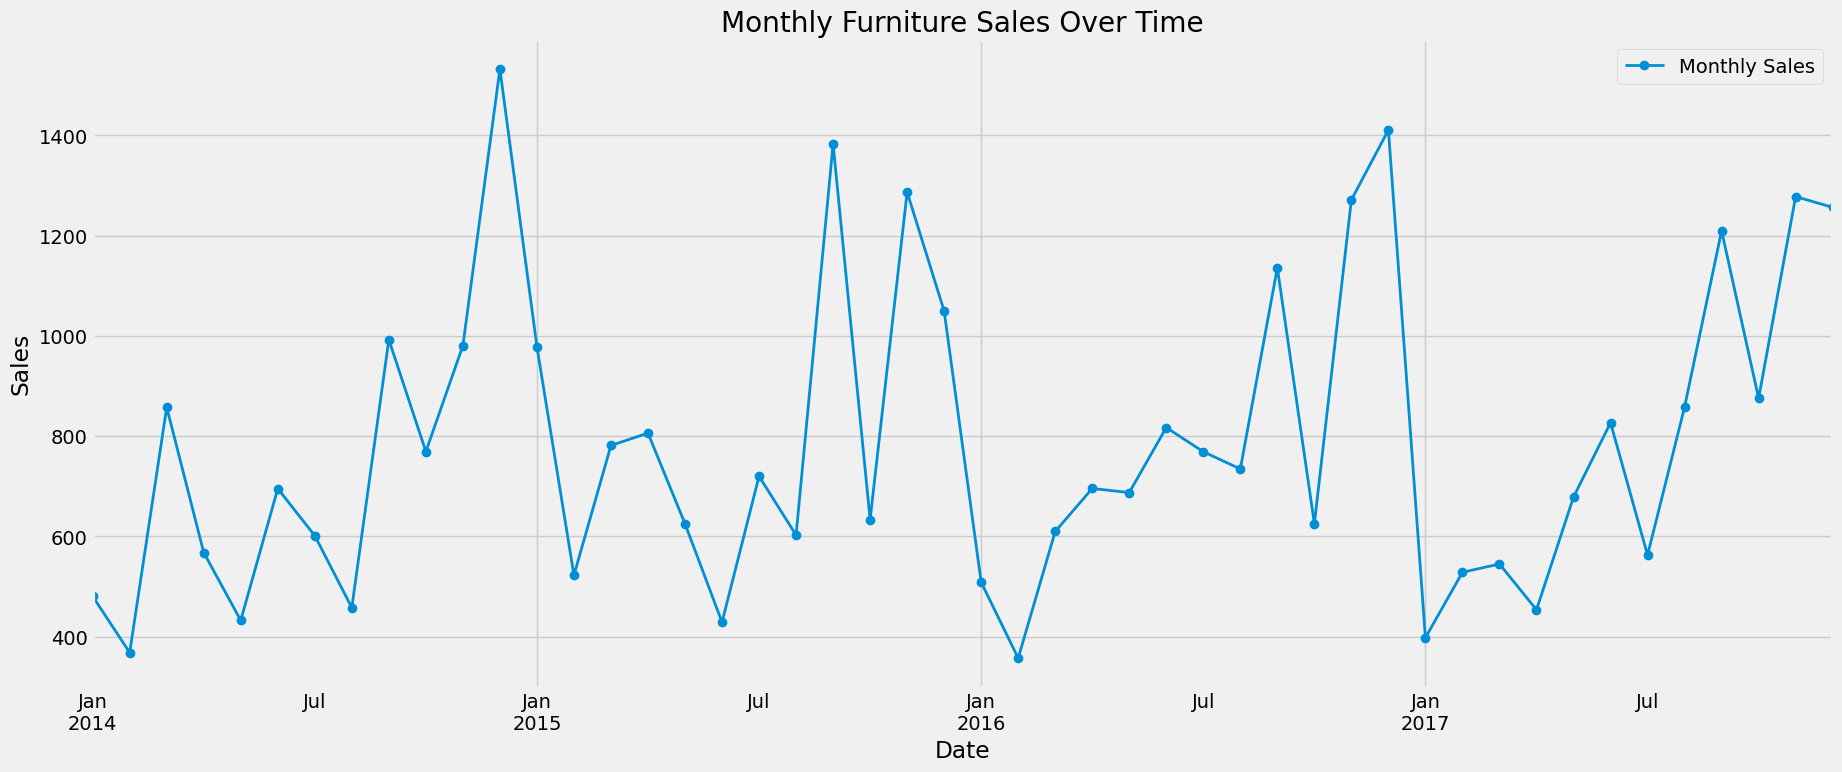

<Figure size 2400x1000 with 0 Axes>

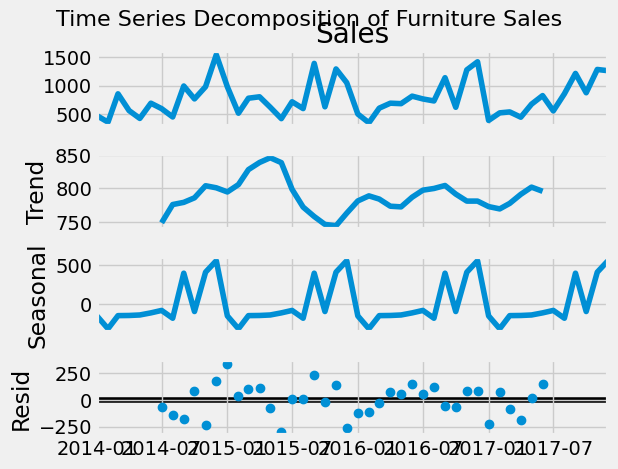

Root Mean Squared Error (RMSE) for ARIMA: 295.50647836639234


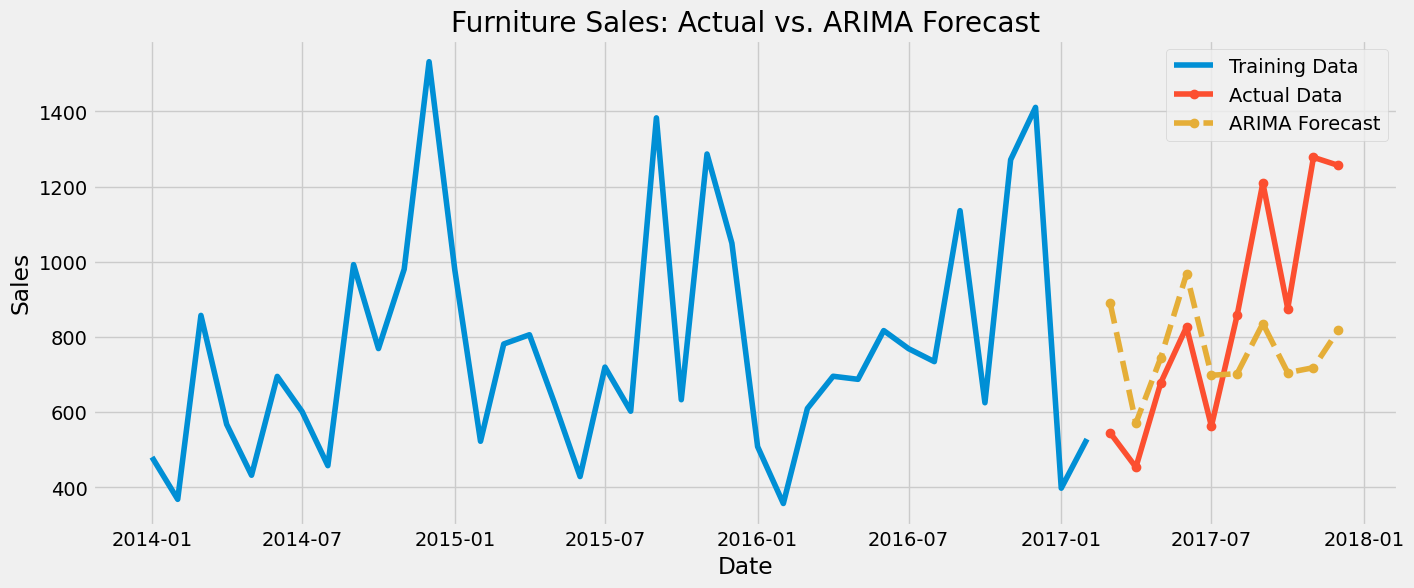

In [4]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Setting up visualization style
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

df = pd.read_excel("/content/Sample - Superstore.xls")
furniture_data = df.loc[df['Category'] == 'Furniture']

start_date, end_date = furniture_data['Order Date'].min(), furniture_data['Order Date'].max()

# Define columns to drop
columns_to_drop = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

# Dropping unnecessary columns
furniture_data.drop(columns_to_drop, axis=1, inplace=True)

# Sort data by order date
furniture_data = furniture_data.sort_values('Order Date')

missing_values = furniture_data.isnull().sum()

daily_sales = furniture_data.groupby('Order Date')['Sales'].sum().reset_index()

# Set order date as the index
daily_sales = daily_sales.set_index('Order Date')

# Resampling data to get monthly average sales
monthly_sales = daily_sales['Sales'].resample('MS').mean()

plt.figure(figsize=(20, 8))
monthly_sales.plot(label='Monthly Sales', linewidth=2, marker='o')
plt.title('Monthly Furniture Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

plt.figure(figsize=(24, 10))

decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')

decomposition.plot()
plt.suptitle('Time Series Decomposition of Furniture Sales', fontsize=16)
plt.show()

"""**Time Series Forecasting with ARIMA**"""

# Import additional libraries for ARIMA forecasting
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def arima_forecast(train_data, test_data, order):
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data))
    return forecast

train_size = int(len(monthly_sales) * 0.8)
train_data, test_data = monthly_sales[0:train_size], monthly_sales[train_size:]

# Define ARIMA order (p, d, q)
order = (5, 1, 0)

arima_predictions = arima_forecast(train_data, test_data, order)

rmse = sqrt(mean_squared_error(test_data, arima_predictions))
print(f'Root Mean Squared Error (RMSE) for ARIMA: {rmse}')

plt.figure(figsize=(15, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Data', marker='o')
plt.plot(test_data.index, arima_predictions, label='ARIMA Forecast', linestyle='dashed', marker='o')
plt.title('Furniture Sales: Actual vs. ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()